<a href="https://colab.research.google.com/github/brahm-dave/preprocessing-and-eda/blob/main/preprocessing_and_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [7]:

df = pd.read_csv("layoffs_data.csv")


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3642 entries, 0 to 3641
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Company                     3642 non-null   object 
 1   Location_HQ                 3642 non-null   object 
 2   Industry                    3642 non-null   object 
 3   Laid_Off_Count              2389 non-null   float64
 4   Date                        3642 non-null   object 
 5   Source                      3642 non-null   object 
 6   Funds_Raised                3252 non-null   float64
 7   Stage                       3642 non-null   object 
 8   Date_Added                  3642 non-null   object 
 9   Country                     3642 non-null   object 
 10  Percentage                  2342 non-null   float64
 11  List_of_Employees_Laid_Off  3642 non-null   object 
dtypes: float64(3), object(9)
memory usage: 341.6+ KB


In [9]:
''''Field	Description
Company:-	Name of the company
Location:-	Location of the company
Industry:-	Type of industry
Layoffs:-	Total layoff count
Percentage:-	Percentage of layoff
Date:-	Date of layoff
Source:-	Source of data
Funds_Raised:-	Total funds raised
Stage:-	Stage of the company
Date_Added:-	Date added in database
Country:-	Country of company location
List_of_Employees_Laid_Off:-	Link to Google Docs of employee list'''

"'Field\tDescription\nCompany:-\tName of the company\nLocation:-\tLocation of the company\nIndustry:-\tType of industry\nLayoffs:-\tTotal layoff count\nPercentage:-\tPercentage of layoff\nDate:-\tDate of layoff\nSource:-\tSource of data\nFunds_Raised:-\tTotal funds raised\nStage:-\tStage of the company\nDate_Added:-\tDate added in database\nCountry:-\tCountry of company location\nList_of_Employees_Laid_Off:-\tLink to Google Docs of employee list"

There can be no direct insights drawn from source of data,date added and list_of_employess so we can drop those columns

In [10]:
# prompt: drop source,  Date_Added and List_of_Employees_Laid_Off

df.drop(columns=["Source", "Date_Added", "List_of_Employees_Laid_Off"], inplace=True)


In [11]:
# # prompt: get the unique values in each column

# for column in df.columns:
#   unique_values = df[column].unique()
#   print(f"Unique values in column '{column}': {unique_values}")


In [38]:
# prompt: check for na values

df.isna().sum()


Company              0
Location_HQ          0
Industry             0
Laid_Off_Count    1253
Date                 0
Funds_Raised       390
Stage                0
Country              0
Percentage        1300
Year                 0
dtype: int64

In [13]:
# prompt: create list of column with null or na values

null_columns = df.columns[df.isnull().any()]
null_columns

Index(['Laid_Off_Count', 'Funds_Raised', 'Percentage'], dtype='object')

In [14]:
# prompt: chect the percentagge of null values in null column

for column in null_columns:
  null_count = df[column].isnull().sum()
  total_count = len(df)
  percentage = (null_count / total_count) * 100
  print(f"Percentage of null values in column '{column}': {percentage:.2f}%")


Percentage of null values in column 'Laid_Off_Count': 34.40%
Percentage of null values in column 'Funds_Raised': 10.71%
Percentage of null values in column 'Percentage': 35.69%


# **as the percentage of null data is high directly dropping it would lead to reduction of data which is not recommended**

In [15]:
# prompt: range of all nummerical col

def get_numerical_range(df):
  """
  This function returns a dictionary containing the minimum and maximum values for each numerical column in a DataFrame.
  """
  numerical_columns = df.select_dtypes(include=["int64", "float64"]).columns
  ranges = {}
  for column in numerical_columns:
    minimum = df[column].min()
    maximum = df[column].max()
    ranges[column] = (minimum, maximum)
  return ranges

ranges = get_numerical_range(df)

for column, (minimum, maximum) in ranges.items():
  print(f"Range of values in column '{column}': ({minimum}, {maximum})")


Range of values in column 'Laid_Off_Count': (3.0, 14000.0)
Range of values in column 'Funds_Raised': (0.0, 121900.0)
Range of values in column 'Percentage': (0.0, 1.0)


In [16]:
# prompt: average off all numerical columns

import numpy as np
numerical_cols = df.select_dtypes(include=np.number)
average_of_numerical_cols = numerical_cols.mean(axis=0)

print(f"Average of numerical columns: {average_of_numerical_cols}")


Average of numerical columns: Laid_Off_Count    257.926329
Funds_Raised      798.569494
Percentage          0.281216
dtype: float64


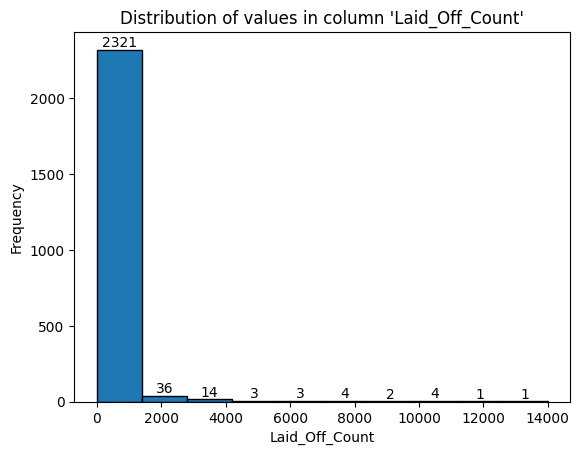

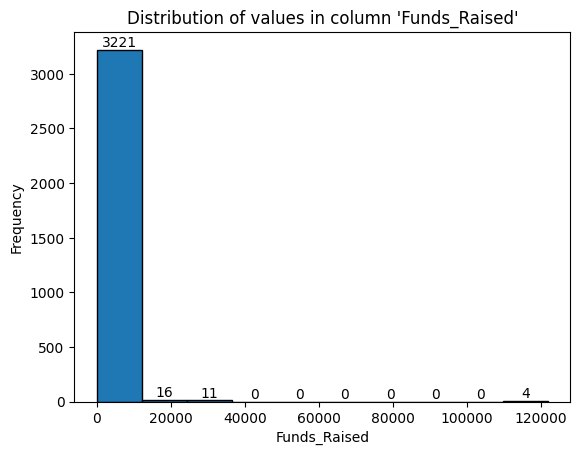

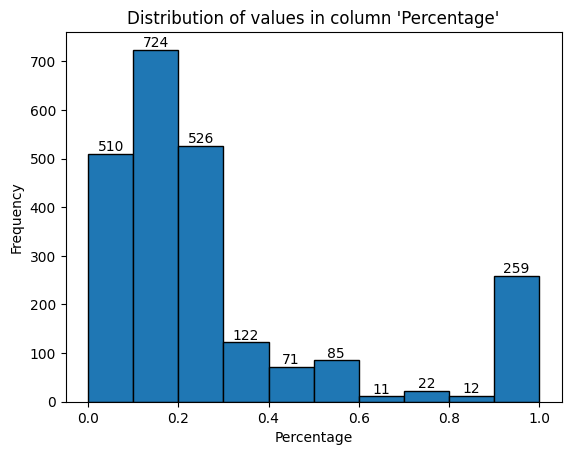

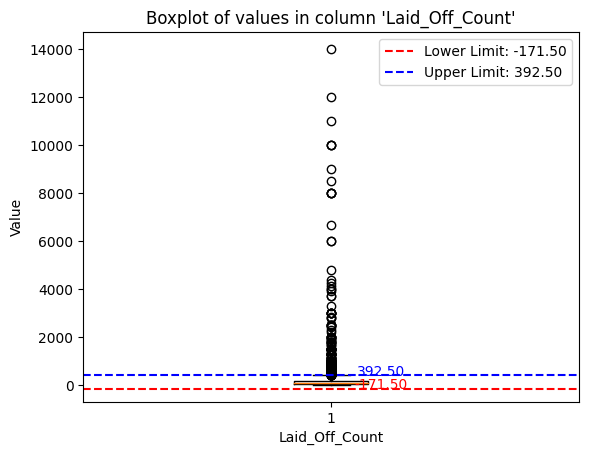

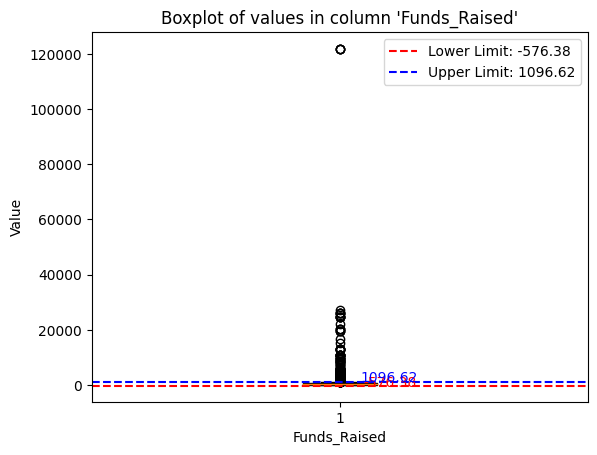

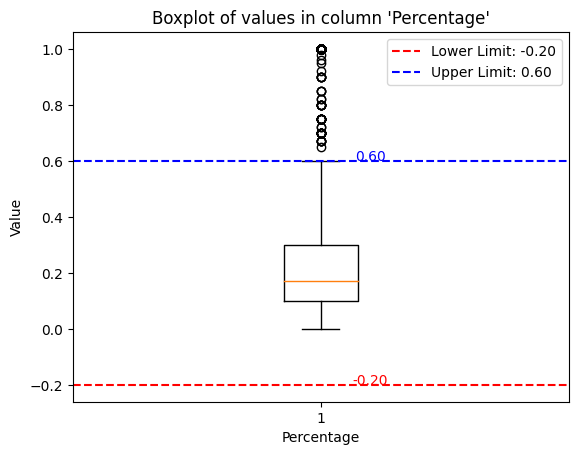

In [17]:
# prompt: graphs for numerical values ignoring na values

import matplotlib.pyplot as plt

# Create histograms for numerical columns
for column in df.select_dtypes(include=["int64", "float64"]):
    data = df[column].dropna()
    n, bins, patches = plt.hist(data, bins=10, edgecolor="black")

    plt.title(f"Distribution of values in column '{column}'")
    plt.xlabel(column)
    plt.ylabel("Frequency")

    # Annotate each bar with its height
    for i in range(len(patches)):
        plt.text(patches[i].get_x() + patches[i].get_width() / 2, patches[i].get_height(),
                 str(int(n[i])), ha='center', va='bottom')

    plt.show()
for column in df.select_dtypes(include=["int64", "float64"]):
    data = df[column].dropna()
    plt.boxplot(data)

    plt.title(f"Boxplot of values in column '{column}'")
    plt.xlabel(column)
    plt.ylabel("Value")

    # Calculate and show upper and lower limits
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    lower_limit = q1 - 1.5 * iqr
    upper_limit = q3 + 1.5 * iqr

    plt.axhline(y=lower_limit, color='red', linestyle='--', label=f'Lower Limit: {lower_limit:.2f}')
    plt.axhline(y=upper_limit, color='blue', linestyle='--', label=f'Upper Limit: {upper_limit:.2f}')

    # Annotate the limits
    plt.text(x=1.1, y=lower_limit, s=f'{lower_limit:.2f}', color='red', ha='center')
    plt.text(x=1.1, y=upper_limit, s=f'{upper_limit:.2f}', color='blue', ha='center')

    plt.legend(loc='upper right')

    plt.show()


<ipython-input-18-80661230929a>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


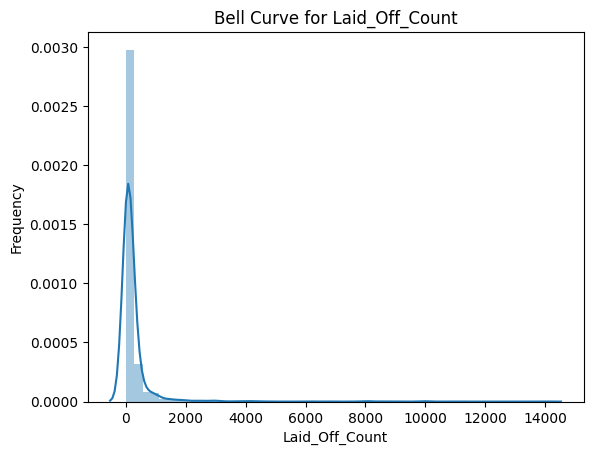

<ipython-input-18-80661230929a>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


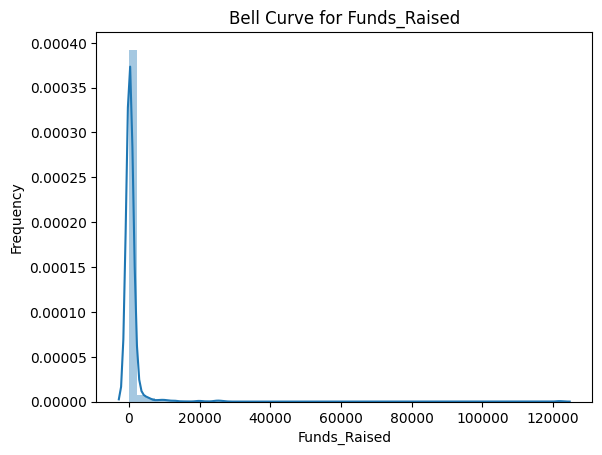

<ipython-input-18-80661230929a>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


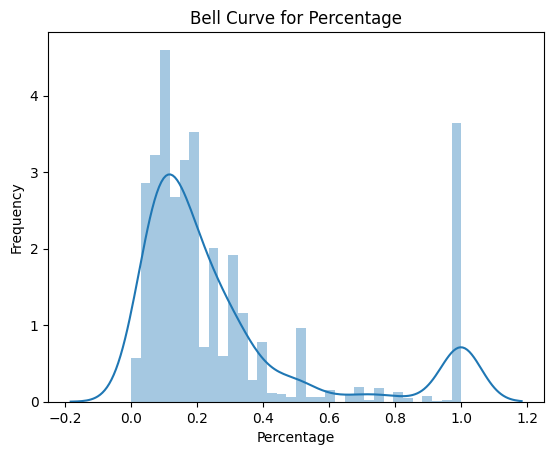

In [18]:
# prompt: create a bell curve for all numerial col

import matplotlib.pyplot as plt
import seaborn as sns

# Create a list of numerical columns
numerical_columns = df.select_dtypes(include=["int64", "float64"]).columns

# Loop through each numerical column and create a bell curve
for column in numerical_columns:
    # Create the bell curve
    sns.distplot(df[column])

    # Set the title and labels
    plt.title(f"Bell Curve for {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")

    # Show the plot
    plt.show()


In [19]:
# prompt: top 10 laid of count

top_10_layoffs = df.sort_values(by="Laid_Off_Count", ascending=False).head(10)

print(f"Top 10 companies with highest layoffs:\n{top_10_layoffs}")


Top 10 companies with highest layoffs:
        Company  Location_HQ        Industry  Laid_Off_Count        Date  \
80        Tesla       Austin  Transportation         14000.0  2024-04-15   
1543     Google  SF Bay Area        Consumer         12000.0  2023-01-20   
2027       Meta  SF Bay Area        Consumer         11000.0  2022-11-09   
1576  Microsoft      Seattle           Other         10000.0  2023-01-18   
1959     Amazon      Seattle          Retail         10000.0  2022-11-16   
1218       Meta  SF Bay Area        Consumer         10000.0  2023-03-14   
1201     Amazon      Seattle          Retail          9000.0  2023-03-20   
1288   Ericsson    Stockholm           Other          8500.0  2023-02-24   
264         SAP     Walldorf           Other          8000.0  2024-01-23   
1076      Flink       Berlin            Food          8000.0  2023-04-24   

      Funds_Raised     Stage        Country  Percentage  
80         20200.0  Post-IPO  United States        0.10  
1543    

# ** as we can observe that the highest numbefr of people laid off are by mncs which is obvious because of the size of the company as size increases the number of peopple laaid off will increase**

In [20]:
# prompt: top 10 percentage of people laid off

top_10_layoffs_percentage = df.sort_values(by="Percentage", ascending=False).head(10)

print(f"Top 10 companies with highest percentage of layoffs:\n{top_10_layoffs_percentage}")


Top 10 companies with highest percentage of layoffs:
             Company    Location_HQ        Industry  Laid_Off_Count  \
30          Mainvest         Boston         Finance             NaN   
26            Karhoo         London  Transportation             NaN   
21            Joonko  New York City              HR             NaN   
3637         Service    Los Angeles          Travel             NaN   
19        Cue Health      San Diego      Healthcare           180.0   
3586     Consider.co    SF Bay Area           Other            13.0   
40         Brilliant    SF Bay Area        Hardware             NaN   
39    Arkane Studios         Austin        Consumer            96.0   
53           Sproutt       Hartford         Finance             NaN   
1072         RenoRun       Montreal    Construction             NaN   

            Date  Funds_Raised     Stage         Country  Percentage  
30    2024-05-14           3.0   Unknown   United States         1.0  
26    2024-05-16       

# **We can observe that the maximum percentage of laid of people are 1.0 . upon performing google search about compannies most companies in this are either inactive or have filed insolvency . hence here 1.0 percentage indicates 100% that is the company itself is disolved**

In [21]:
# prompt: all the company with percentage==1

companies_with_100_percent_layoffs = df[df["Percentage"] == 1.0]["Company"]

print(f"Companies with 100% layoffs:\n{companies_with_100_percent_layoffs}")


Companies with 100% layoffs:
19          Cue Health
21              Joonko
26              Karhoo
30            Mainvest
39      Arkane Studios
             ...      
3625           Service
3628            Ejento
3632             Popin
3636          Help.com
3637           Service
Name: Company, Length: 250, dtype: object


# **Upon observing we are getting the most outliers in the above range lets see the range of outliers**

In [22]:
# prompt: minimu outlier and max outlier

def get_outliers(df, column):
  """
  This function returns the minimum outlier and maximum outlier for a given column in a DataFrame.
  """
  q1 = df[column].quantile(0.25)
  q3 = df[column].quantile(0.75)
  iqr = q3 - q1
  lower_limit = q1 - 1.5 * iqr
  upper_limit = q3 + 1.5 * iqr
  minimum_outlier = df[column][df[column] > upper_limit].min()
  maximum_outlier = df[column][df[column] > upper_limit].max()
  return minimum_outlier, maximum_outlier

# Get minimum and maximum outliers for numerical columns
for column in df.select_dtypes(include=["int64", "float64"]):
  minimum_outlier, maximum_outlier = get_outliers(df, column)
  print(f"Minimum outlier for column '{column}': {minimum_outlier}")
  print(f"Maximum outlier for column '{column}': {maximum_outlier}")


Minimum outlier for column 'Laid_Off_Count': 400.0
Maximum outlier for column 'Laid_Off_Count': 14000.0
Minimum outlier for column 'Funds_Raised': 1100.0
Maximum outlier for column 'Funds_Raised': 121900.0
Minimum outlier for column 'Percentage': 0.65
Maximum outlier for column 'Percentage': 1.0


In [23]:
# prompt: count the number of outliers in daata

def count_outliers(df, column):
  """
  This function counts the number of outliers in a given column of a DataFrame.
  """
  q1 = df[column].quantile(0.25)
  q3 = df[column].quantile(0.75)
  iqr = q3 - q1
  lower_limit = q1 - 1.5 * iqr
  upper_limit = q3 + 1.5 * iqr
  outliers = df[~((df[column] >= lower_limit) & (df[column] <= upper_limit))]
  return len(outliers)

# Loop through each numerical column and count the outliers
for column in df.select_dtypes(include=["int64", "float64"]):
  outlier_count = count_outliers(df, column)
  print(f"Number of outliers in column '{column}': {outlier_count}")


Number of outliers in column 'Laid_Off_Count': 1532
Number of outliers in column 'Funds_Raised': 747
Number of outliers in column 'Percentage': 1604


In [24]:
df['Percentage']

0        NaN
1       0.20
2       0.30
3       0.10
4       0.12
        ... 
3637    1.00
3638    0.10
3639    0.75
3640    0.40
3641     NaN
Name: Percentage, Length: 3642, dtype: float64

In [25]:
#prompt: for the list of null_columns give the top companys with null values in each colomn

for column in null_columns:
  top_companies = df[df[column].isnull()].groupby('Company')['Company'].count().sort_values(ascending=False).head(5)
  print(f"Top 5 companies with null values in '{column}':")
  print(top_companies)


Top 5 companies with null values in 'Laid_Off_Count':
Company
Google        5
Amazon        4
Better.com    4
Expedia       4
Shift         4
Name: Company, dtype: int64
Top 5 companies with null values in 'Funds_Raised':
Company
Qualcomm    4
Shopee      4
TikTok      4
IBM         3
Bybit       3
Name: Company, dtype: int64
Top 5 companies with null values in 'Percentage':
Company
Google       11
Amazon       10
Microsoft     6
Intel         5
Expedia       5
Name: Company, dtype: int64


In [26]:
# prompt: duplicate values in company+Location_HQ
#  with repeattaion number

import pandas as pd

# Create a new DataFrame with duplicate values in 'Company' and 'Location_HQ'
df_duplicates = df[df.duplicated(['Company', 'Location_HQ'])]

# Group the DataFrame by 'Company' and 'Location_HQ' and count the number of duplicates
df_duplicates = df_duplicates.groupby(['Company', 'Location_HQ']).size().to_frame(name='Count')

# Sort the DataFrame by 'Count' in descending order
df_duplicates = df_duplicates.sort_values(by='Count', ascending=False)

# Print the DataFrame
print(df_duplicates)


                            Count
Company      Location_HQ         
Amazon       Seattle           11
Google       SF Bay Area       11
Microsoft    Seattle            6
Gopuff       Philadelphia       5
Better.com   New York City      5
...                           ...
Wix          Tel Aviv           1
Wonder       New York City      1
Wonderschool SF Bay Area        1
Yahoo        SF Bay Area        1
Wattpad      Toronto            1

[640 rows x 1 columns]


# **as we can see that there are multiple duplicate values with same company this could be an inconsistency in data because there could be an overlap in fired employees and data**

Lets check for exact duplicates

In [27]:
# prompt: check for duplicates in df

duplicate_df = df[df.duplicated()]

print(f"Number of duplicate rows: {len(duplicate_df)}")

if len(duplicate_df) > 0:
  print(duplicate_df)


Number of duplicate rows: 2
          Company  Location_HQ        Industry  Laid_Off_Count        Date  \
2164  Beyond Meat  Los Angeles            Food           200.0  2022-10-14   
2775        Cazoo       London  Transportation           750.0  2022-06-07   

      Funds_Raised     Stage         Country  Percentage  
2164         122.0  Post-IPO   United States        0.19  
2775        2000.0  Post-IPO  United Kingdom        0.15  


In [28]:
# prompt: drop the duplicated columns

df.drop_duplicates(inplace=True)


In [29]:
# prompt: check for duplicates in df

duplicate_df = df[df.duplicated()]

print(f"Number of duplicate rows: {len(duplicate_df)}")

if len(duplicate_df) > 0:
  print(duplicate_df)


Number of duplicate rows: 0


the internal duplicacy cant be removed because we have to manually clean data for some cases

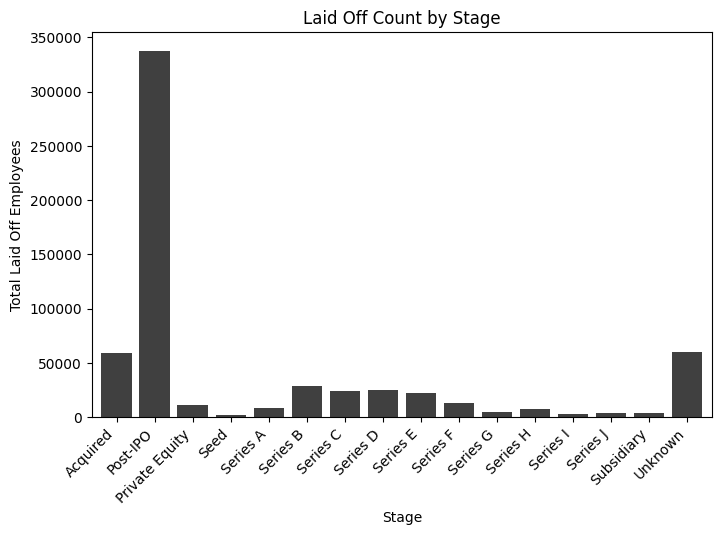

In [31]:
# prompt: create a Laid_Off_Count by adding using grouping by stage and draw a graph

import matplotlib.pyplot as plt
# Group the data by stage and calculate the total number of laid off employees
grouped_df = df.groupby('Stage')['Laid_Off_Count'].agg('sum')

# Create a bar plot
grouped_df.plot(kind='bar', color='k', alpha=0.75, width=0.8, figsize=(8, 5))

# Add labels and title
plt.ylabel('Total Laid Off Employees')
plt.title('Laid Off Count by Stage')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()


In [32]:
# prompt: num of rows of each stage

df['Stage'].value_counts()


Stage
Post-IPO          766
Unknown           618
Series B          429
Series C          405
Series D          316
Acquired          314
Series A          245
Series E          171
Seed              117
Series F          102
Private Equity     63
Series H           33
Series G           23
Subsidiary         21
Series J            9
Series I            8
Name: count, dtype: int64

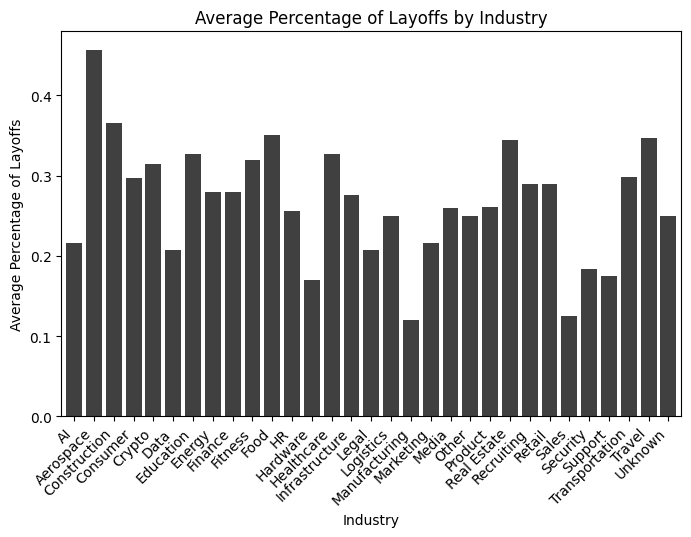

In [33]:
# prompt: draw a graph with average percentage

import matplotlib.pyplot as plt
# Calculate the average percentage of layoffs for each industry
average_percentage_by_industry = df.groupby('Industry')['Percentage'].mean()

# Create a bar plot
average_percentage_by_industry.plot(kind='bar', color='k', alpha=0.75, width=0.8, figsize=(8, 5))

# Add labels and title
plt.ylabel('Average Percentage of Layoffs')
plt.title('Average Percentage of Layoffs by Industry')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()


This graph shows that most industries which maximum layoffs

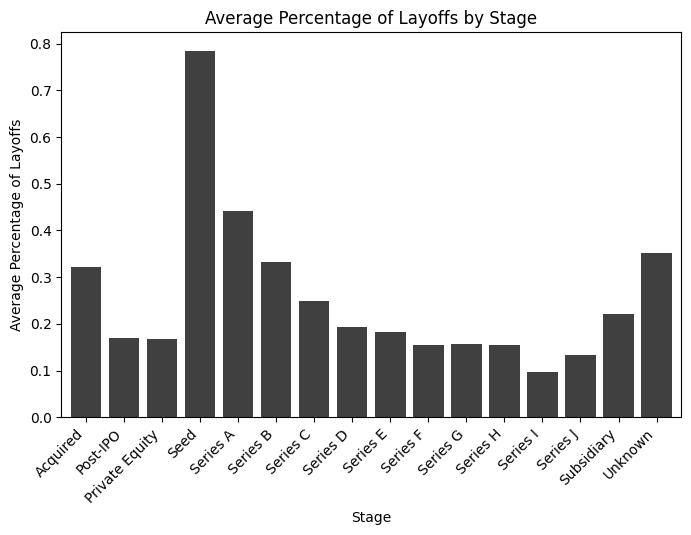

In [34]:
# prompt: draw a graph with average percentage

import matplotlib.pyplot as plt
# Calculate the average percentage of layoffs for each industry
average_percentage_by_industry = df.groupby('Stage')['Percentage'].mean()

# Create a bar plot
average_percentage_by_industry.plot(kind='bar', color='k', alpha=0.75, width=0.8, figsize=(8, 5))

# Add labels and title
plt.ylabel('Average Percentage of Layoffs')
plt.title('Average Percentage of Layoffs by Stage')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()


# **a very important inference can be derived from the graph that most percentage of lay offs are in the seed unded startups because its always uncertain that a startup will need how much workforce and startup has high risk to reward ratio**

Lets track by extracting according to yesr

In [35]:
# prompt: extract the year from date

import pandas as pd
df['Year'] = pd.DatetimeIndex(df['Date']).year


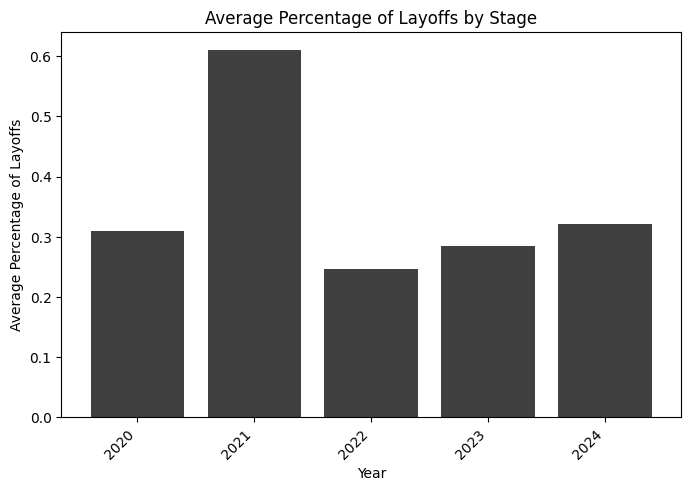

In [36]:
# prompt: draw a graph with average percentage

import matplotlib.pyplot as plt
# Calculate the average percentage of layoffs for each industry
average_percentage_by_industry = df.groupby('Year')['Percentage'].mean()

# Create a bar plot
average_percentage_by_industry.plot(kind='bar', color='k', alpha=0.75, width=0.8, figsize=(8, 5))

# Add labels and title
plt.ylabel('Average Percentage of Layoffs')
plt.title('Average Percentage of Layoffs by Stage')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

# **The maximum lay off are in 2021 because it was covid year**

# **now replacing funding data null values by taking average of funding according to company stage**

In [37]:
# prompt: genrate average of Funds_raised according to stage ignoring null values

def average_funds_raised_by_stage(df):
  """
  This function calculates the average funds raised for each stage, ignoring null values.
  """
  average_funds_raised = {}
  for stage in df['Stage'].unique():
    stage_funds = df[df['Stage'] == stage]['Funds_Raised'].dropna()
    if len(stage_funds) > 0:
      average_funds_raised[stage] = stage_funds.mean()
  return average_funds_raised

average_funds_raised = average_funds_raised_by_stage(df)

for stage, average_funds in average_funds_raised.items():
  print(f"Average funds raised for {stage}: {average_funds}")



Average funds raised for Unknown: 534.7997727272727
Average funds raised for Post-IPO: 2287.2595342066957
Average funds raised for Series B: 106.99426540284361
Average funds raised for Series A: 44.244255319148934
Average funds raised for Acquired: 417.19506172839505
Average funds raised for Series G: 990.3913043478261
Average funds raised for Series F: 725.829702970297
Average funds raised for Series C: 201.12917705735663
Average funds raised for Series D: 375.0181229773463
Average funds raised for Series H: 3252.6060606060605
Average funds raised for Series E: 596.6549707602339
Average funds raised for Series J: 3138.0
Average funds raised for Seed: 6.814187500000001
Average funds raised for Private Equity: 885.1346428571429
Average funds raised for Subsidiary: 3250.0
Average funds raised for Series I: 3092.0


In [39]:

# Replace null values in 'Funds_Raised' with the average funds raised for the corresponding stage
for stage, average_funds in average_funds_raised.items():
  df.loc[df['Stage'] == stage, 'Funds_Raised'] = df.loc[df['Stage'] == stage, 'Funds_Raised'].fillna(average_funds)

# **Replaced the laid off count by using the average according to the respective industry**

In [42]:


def fill_null_laid_off_count(df):
  """
  This function fills null values in the 'Laid_Off_Count' column with the average laid off count for the corresponding industry.
  """
  average_laid_off_count_by_industry = df.groupby('Industry')['Laid_Off_Count'].mean()
  for industry, average_count in average_laid_off_count_by_industry.items():
    df.loc[df['Industry'] == industry, 'Laid_Off_Count'] = df.loc[df['Industry'] == industry, 'Laid_Off_Count'].fillna(average_count)
  return df

df = fill_null_laid_off_count(df)


# **Replaced the percentage by using the average according to the stage**

In [43]:

def fill_null_percentage(df):
  """
  This function fills null values in the 'Percentage' column with the average percentage for the corresponding stage.
  """
  average_percentage_by_stage = df.groupby('Stage')['Percentage'].mean()
  for stage, average_percentage in average_percentage_by_stage.items():
    df.loc[df['Stage'] == stage, 'Percentage'] = df.loc[df['Stage'] == stage, 'Percentage'].fillna(average_percentage)
  return df

df = fill_null_percentage(df)


In [44]:


df.isnull().sum()


Company           0
Location_HQ       0
Industry          0
Laid_Off_Count    0
Date              0
Funds_Raised      0
Stage             0
Country           0
Percentage        0
Year              0
dtype: int64